# Clustering the protein dataset

The goal is to cluster the data with several different methods, in order to find the annotations that match the clusters thee best. 

## Creating the datasets

### Protein datasets

In [3]:
from subpred.dataset import create_dataset, SUBSTRATE_KEYWORDS

df_uniprot = create_dataset(
    input_file="../data/raw/uniprot/uniprot_2022_05_evidence1-2_nofragments.tsv",
    # keywords_classes = None,
    # keywords_classes_all = SUBSTRATE_KEYWORDS,
    # keywords_filter = None,
    multi_substrate="keep",
    # outliers=outliers,
    verbose=True,
    # tax_ids_filter=[3702, 9606, 83333, 559292],
    # sequence_clustering=70,
    evidence_code=2,
    invalid_amino_acids="remove_amino_acids",
    # gene_names_only = True,
    # force_update=True,
    # remove_sequence_fragments = True,
    # force_update = False,
    tcdb_substrates_file="../data/raw/tcdb/tcdb_substrates.tsv",
    swissprot_only=False,
)
print(df_uniprot.shape)
df_uniprot.head()


Found pickle, reading...
(1021957, 16)


gene_names  \
Uniprot                                         
A0A0C5B5G6                            MT-RNR1   
A0A1B0GTW7                        CIROP LMLN2   
A0JNW5      BLTP3B KIAA0701 SHIP164 UHRF1BP1L   
A0JP26                                 POTEB3   
A0PK11                                  CLRN2   

                                                protein_names  reviewed  \
Uniprot                                                                   
A0A0C5B5G6  Mitochondrial-derived peptide MOTS-c (Mitochon...  reviewed   
A0A1B0GTW7  Ciliated left-right organizer metallopeptidase...  reviewed   
A0JNW5      Bridge-like lipid transfer protein family memb...  reviewed   
A0JP26                   POTE ankyrin domain family member B3  reviewed   
A0PK11                                               Clarin-2  reviewed   

                    protein_existence  \
Uniprot                                 
A0A0C5B5G6  Evidence at protein level   
A0A1B0GTW7  Evidence at protein level   
A0JNW5      Evidence at protein level   
A0JP26      Evidence at protein level   
A0PK11      Evidence at protein level   

                                                     sequence  organism_id  \
Uniprot                                                                      
A0A0C5B5G6                                   MRWQEMGYIFYPRKLR         9606   
A0A1B0GTW7  MLLLLLLLLLLPPLVLRVAASRCLHDETQKSVSLLRPPFSQLPSKS...         9606   
A0JNW5      MAGIIKKQILKHLSRFTKNLSPDKINLSTLKGEGELKNLELDEEVL...         9606   
A0JP26      MVAEVCSMPAASAVKKPFDLRSKMGKWCHHRFPCCRGSGKSNMGTS...         9606   
A0PK11      MPGWFKKAWYGLASLLSFSSFILIIVALVVPHWLSGKILCQTGVDL...         9606   

                                                       go_ids  \
Uniprot                                                         
A0A0C5B5G6  GO:0001649; GO:0003677; GO:0005615; GO:0005634...   
A0A1B0GTW7  GO:0004222; GO:0005737; GO:0006508; GO:0007155...   
A0JNW5      GO:0005769; GO:0005829; GO:0034498; GO:0042803...   
A0JP26                                                    NaN   
A0PK11      GO:0007605; GO:0032421; GO:0060088; GO:0060171...   

                                                  keyword_ids  \
Uniprot                                                         
A0A0C5B5G6  KW-0238; KW-0496; KW-0539; KW-0892; KW-1185; K...   
A0A1B0GTW7  KW-0025; KW-0225; KW-0325; KW-1056; KW-0378; K...   
A0JNW5      KW-0025; KW-0175; KW-0963; KW-0967; KW-0597; K...   
A0JP26            KW-0025; KW-0040; KW-0175; KW-1185; KW-0677   
A0PK11      KW-1003; KW-0966; KW-0209; KW-0225; KW-0325; K...   

                                                     keywords     tcdb_id  \
Uniprot                                                                     
A0A0C5B5G6  DNA-binding;Mitochondrion;Nucleus;Osteogenesis...         NaN   
A0A1B0GTW7  Alternative splicing;Disease variant;Glycoprot...         NaN   
A0JNW5      Alternative splicing;Coiled coil;Cytoplasm;End...         NaN   
A0JP26      Alternative splicing;ANK repeat;Coiled coil;Re...         NaN   
A0PK11      Cell membrane;Cell projection;Deafness;Disease...  9.A.46.1.2   

                                  interpro tcdb_class tcdb_substrates  \
Uniprot                                                                 
A0A0C5B5G6                             NaN        0.0             NaN   
A0A1B0GTW7                      IPR001577;        0.0             NaN   
A0JNW5                IPR026728;IPR026854;        0.0             NaN   
A0JP26      IPR002110;IPR036770;IPR039497;        0.0             NaN   
A0PK11                          IPR026748;        9.A             NaN   

           keywords_substrates keywords_transport_related keywords_location  
Uniprot                                                                      
A0A0C5B5G6                                                                   
A0A1B0GTW7                                                                   
A0JNW5                                                

In [4]:
df_swissprot = df_uniprot[df_uniprot.reviewed == "reviewed"]
df_swissprot.shape


(146597, 16)

### Annotation datasets

In [5]:
from subpred.dataset import get_go_df, get_keywords_df, get_tcdb_substrates

df_kw_uniprot = get_keywords_df(df_uniprot)
df_kw_uniprot.head()


Uniprot             keyword
0  A0A0C5B5G6         DNA-binding
1  A0A0C5B5G6       Mitochondrion
2  A0A0C5B5G6             Nucleus
3  A0A0C5B5G6        Osteogenesis
4  A0A0C5B5G6  Reference proteome

In [6]:
df_kw_uniprot_long = df_kw_uniprot.assign(dataset="keyword").rename(
    columns={"keyword": "annotation"}
)[["Uniprot", "dataset", "annotation"]]
df_kw_uniprot_long.head()


Uniprot  dataset          annotation
0  A0A0C5B5G6  keyword         DNA-binding
1  A0A0C5B5G6  keyword       Mitochondrion
2  A0A0C5B5G6  keyword             Nucleus
3  A0A0C5B5G6  keyword        Osteogenesis
4  A0A0C5B5G6  keyword  Reference proteome

In [7]:
from subpred.go_utils import GeneOntology

go = GeneOntology("../data/raw/ontologies/go.owl")


In [8]:
df_go_uniprot = get_go_df(df_uniprot, go)
df_go_uniprot.head()


Uniprot       go_id                     go_term
0  A0A0C5B5G6  GO:0001649  osteoblast differentiation
1  A0A0C5B5G6  GO:0003677                 DNA binding
2  A0A0C5B5G6  GO:0005615         extracellular space
3  A0A0C5B5G6  GO:0005634                     nucleus
4  A0A0C5B5G6  GO:0005739               mitochondrion

In [9]:
df_go_uniprot_long = df_go_uniprot.melt(
    id_vars=["Uniprot"],
    value_vars=["go_id", "go_term"],
    var_name="dataset",
    value_name="annotation",
)
# df_go_uniprot_long = df_go_uniprot_long[df_go_uniprot_long.dataset == "go_term"]
df_go_uniprot_long.head()


Uniprot dataset  annotation
0  A0A0C5B5G6   go_id  GO:0001649
1  A0A0C5B5G6   go_id  GO:0003677
2  A0A0C5B5G6   go_id  GO:0005615
3  A0A0C5B5G6   go_id  GO:0005634
4  A0A0C5B5G6   go_id  GO:0005739

In [10]:
# TODO TCDB classes
df_tcdb_uniprot = get_tcdb_substrates(df_uniprot)
df_tcdb_uniprot = df_tcdb_uniprot.assign(
    tcdb_class=df_tcdb_uniprot.tcdb_id.apply(lambda x: x[:3])
)
df_tcdb_uniprot.head()


Uniprot     tcdb_id     chebi_id  chebi_term tcdb_class
0  A6NI61   1.N.2.1.1  CHEBI:25367    molecule        1.N
1  A6NKB5  9.A.80.1.1  CHEBI:24636      proton        9.A
2  O00168  1.A.27.1.8  CHEBI:22563       anion        1.A
3  O00337  2.A.41.2.3   CHEBI:9175  sodium(1+)        2.A
4  O00337  2.A.41.2.3   CHEBI:9893     uridine        2.A

In [11]:
df_tcdb_uniprot_long = df_tcdb_uniprot.melt(
    id_vars=["Uniprot"],
    value_vars=["tcdb_id", "chebi_id", "chebi_term"],
    var_name="dataset",
    value_name="annotation",
)
df_tcdb_uniprot_long.head()


Uniprot  dataset  annotation
0  A6NI61  tcdb_id   1.N.2.1.1
1  A6NKB5  tcdb_id  9.A.80.1.1
2  O00168  tcdb_id  1.A.27.1.8
3  O00337  tcdb_id  2.A.41.2.3
4  O00337  tcdb_id  2.A.41.2.3

In [12]:
import pandas as pd

df_uniprot_interpro = (
    df_uniprot.interpro.dropna().str.rstrip(";").str.split(";").explode().str.strip()
)
assert df_uniprot_interpro[~df_uniprot_interpro.str.match("IPR[0-9]{6}")].shape[0] == 0
df_uniprot_interpro = df_uniprot_interpro.reset_index(
    drop=False
)  # [df_uniprot_interpro.isnull()]
df_uniprot_interpro


Uniprot   interpro
0        A0A1B0GTW7  IPR001577
1            A0JNW5  IPR026728
2            A0JNW5  IPR026854
3            A0JP26  IPR002110
4            A0JP26  IPR036770
...             ...        ...
4190605      X5MFI4  IPR029044
4190606      X5MI49  IPR008630
4190607      X5MI49  IPR029044
4190608      X5MPI5  IPR008630
4190609      X5MPI5  IPR029044

[4190610 rows x 2 columns]

In [13]:
df_uniprot_interpro_long = df_uniprot_interpro.assign(dataset="interpro").rename(
    columns={"interpro": "annotation"}
)[["Uniprot", "dataset", "annotation"]]
df_uniprot_interpro_long.head()


Uniprot   dataset annotation
0  A0A1B0GTW7  interpro  IPR001577
1      A0JNW5  interpro  IPR026728
2      A0JNW5  interpro  IPR026854
3      A0JP26  interpro  IPR002110
4      A0JP26  interpro  IPR036770

In [14]:
df_uniprot_organism_long = (
    df_uniprot.organism_id.reset_index(drop=False)
    .drop_duplicates()
    .assign(dataset="organism_id")
    .rename(columns={"organism_id": "annotation"})[["Uniprot", "dataset", "annotation"]]
)


### Dataframe containing all annotations

In [15]:
df_annotations = pd.concat(
    [
        df_kw_uniprot_long,
        df_go_uniprot_long,
        df_tcdb_uniprot_long,
        df_uniprot_interpro_long,
        df_uniprot_organism_long,
    ],
    ignore_index=True,
)

df_annotations = df_annotations[~df_annotations.duplicated()]

assert df_annotations[df_annotations.Uniprot.isnull()].shape[0] == 0
assert df_annotations[df_annotations.dataset.isnull()].shape[0] == 0
assert df_annotations[df_annotations.annotation.isnull()].shape[0] == 0

df_annotations.head()


Uniprot  dataset          annotation
0  A0A0C5B5G6  keyword         DNA-binding
1  A0A0C5B5G6  keyword       Mitochondrion
2  A0A0C5B5G6  keyword             Nucleus
3  A0A0C5B5G6  keyword        Osteogenesis
4  A0A0C5B5G6  keyword  Reference proteome

## TODOs

- Should I only keep proteins for which all/most types of annotation are available?
    - Most proteins do not have TCDB id, so that would not be feasible
- Add non-Uniprot GO terms?
    - Fewer terms, but we know the qualifiers and evidence codes
- Encode sequences
    - AAC, PAAC
    - Seqvec
    - Internal encoding of clustering program
- Calculate clusters
    - CD-Hit
    - MMseqs2 (used by PDB) (TODO install in env, export new env)
        - Also provides search functionality, for example for annotating organism. Can this be used to predict things with homology?
    - Sklearn unsupervised learning
- Analysis
    - Enrichment analysis of clusters, sort
        - GSEA etc.
        - Hypergeometric test
    - Rand index
- Only use Protein level evidence proteins?
- PCA
    - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3982804/


## Trying PAAC + sklearn

In [16]:
import seaborn as sns

sns.set(rc={"figure.figsize": (15, 12)})
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from subpred.compositions import calculate_aac, calculate_paac


In [17]:
transmembrane_transporter_terms = go.get_descendants(
    go.get_identifier("transmembrane transporter activity")
)

amino_transporter_terms = go.get_descendants(
    go.get_identifier("amino acid transmembrane transporter activity")
)

In [18]:
transmembrane_transporters = set(
    df_annotations[
        (df_annotations.dataset == "go_id")
        & df_annotations.annotation.isin(transmembrane_transporter_terms)
    ].Uniprot.unique()
)

amino_transporters = set(
    df_annotations[
        (df_annotations.dataset == "go_id")
        & df_annotations.annotation.isin(amino_transporter_terms)
    ].Uniprot.unique()
)


In [19]:
""" TODO 
- Was sind die GO terms mit den meisten transmembran-Proteinen im Datensatz?
    - Color them in plots!
- GO terms aus anderem File? Momentan sind nur Uniprot im Datensatz
"""


' TODO \n- Was sind die GO terms mit den meisten transmembran-Proteinen im Datensatz?\n    - Color them in plots!\n- GO terms aus anderem File? Momentan sind nur Uniprot im Datensatz\n'

In [20]:
transmembrane_transporter_descendants = go.get_descendants(
    go.get_identifier("transmembrane transporter activity")
)

df_transmembrane_transporter_descendants = df_annotations[
    df_annotations.annotation.isin(transmembrane_transporter_descendants)
]
df_transmembrane_transporter_descendants = (
    df_transmembrane_transporter_descendants.rename(columns={"annotation": "go_id"})
    .merge(df_go_uniprot[["go_id", "go_term"]], how="left", on="go_id")
    .drop_duplicates()
)

df_transmembrane_transporter_descendants


Uniprot dataset       go_id  \
0         B7U540   go_id  GO:0005242   
344       O00168   go_id  GO:0005254   
1239      O00337   go_id  GO:0005337   
1415      O00337   go_id  GO:0005345   
1499      O00337   go_id  GO:0005415   
...          ...     ...         ...   
72024449  X5IHB7   go_id  GO:0008324   
72024921  X5II77   go_id  GO:0008324   
72025393  X5IYJ3   go_id  GO:0008324   
72025865  X5J6M9   go_id  GO:0005262   
72026635  X5KNE8   go_id  GO:0015204   

                                                    go_term  
0               inward rectifier potassium channel activity  
344                               chloride channel activity  
1239          nucleoside transmembrane transporter activity  
1415      purine nucleobase transmembrane transporter ac...  
1499                   nucleoside:sodium symporter activity  
...                                                     ...  
72024449          cation transmembrane transporter activity  
72024921          cation transmembrane transporter activity  
72025393          cation transmembrane transporter activity  
72025865                           calcium channel activity  
72026635            urea transmembrane transporter activity  

[61821 rows x 4 columns]

In [21]:
df_transmembrane_transporter_descendants.go_term.value_counts()[:10]


transmembrane transporter activity                           5872
ABC-type transporter activity                                2239
symporter activity                                           1716
proton-transporting ATPase activity, rotational mechanism    1627
maltose transporting porin activity                          1591
maltodextrin transmembrane transporter activity              1591
channel activity                                             1550
cytochrome-c oxidase activity                                1385
voltage-gated potassium channel activity                     1226
NADH dehydrogenase (ubiquinone) activity                     1132
Name: go_term, dtype: int64

In [22]:
sequences_uniprot = df_uniprot.sequence
sequences_transmembrane_transporters = sequences_uniprot[
    sequences_uniprot.index.isin(transmembrane_transporters)
]


In [23]:
sequences = sequences_transmembrane_transporters

In [62]:
import matplotlib.pyplot as plt

In [60]:
df_aac = calculate_aac(sequences)
df_paac = calculate_paac(sequences)

### Plots

#### AAC

##### Kmeans + PCA

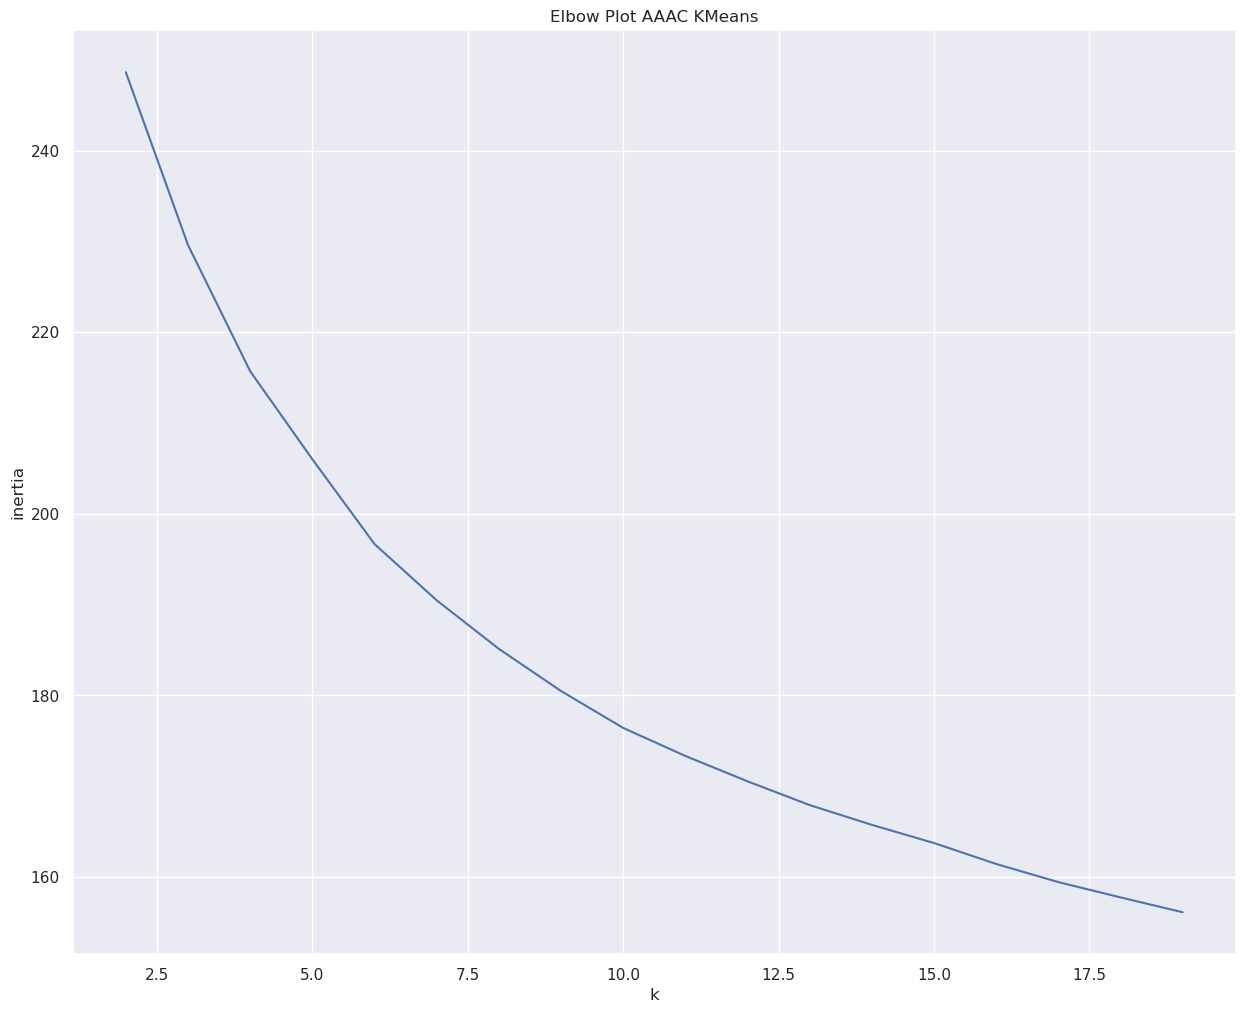

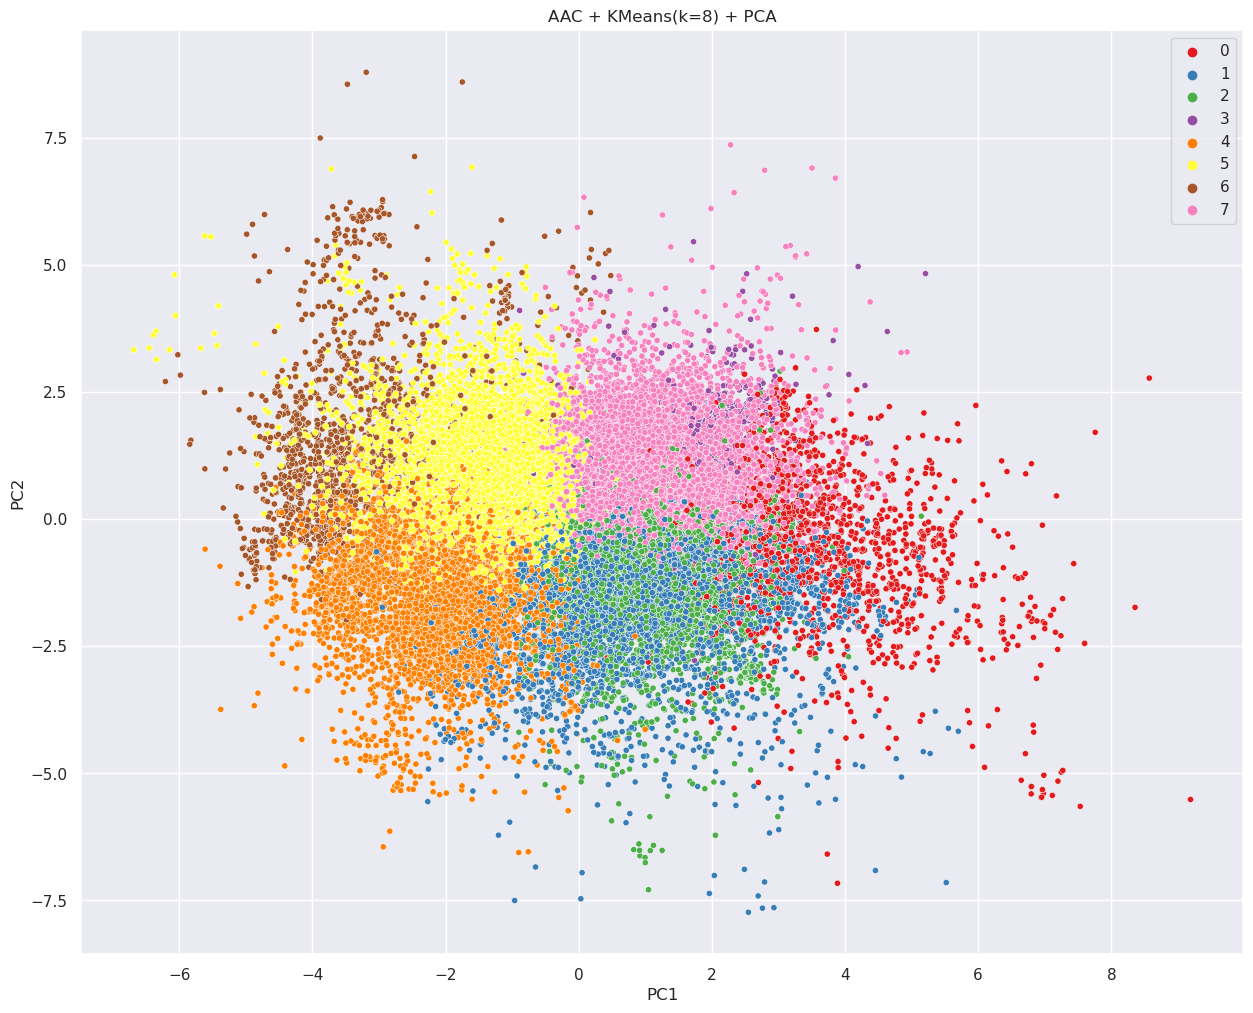

In [110]:
inertias = []
k_values = list(range(2, 20))
for k in k_values:
    kmeans_tmp = KMeans(random_state=0, n_clusters=k)
    kmeans_tmp.fit(df_aac)
    inertias.append(kmeans_tmp.inertia_)

ax=pd.Series(data=inertias, index=k_values).plot()
ax.set_title("Elbow Plot AAAC KMeans")
ax.set_xlabel("k")
ax.set_ylabel("inertia")
plt.show()

num_clusters = 8

kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=num_clusters, random_state=0))

kmeans.fit(df_aac)
labels_kmeans = kmeans["kmeans"].labels_

pipe = make_pipeline(StandardScaler(), PCA(n_components=2,random_state=0))
df_pca = pd.DataFrame(pipe.fit_transform(df_aac), columns=["PC1", "PC2"])
ax = sns.scatterplot(df_pca, x="PC1", y="PC2", hue=labels_kmeans, palette="Set1", s=20)
ax.set_title("AAC + KMeans(k=8) + PCA")

plt.show()


##### Kmeans + TSNE

/home/ad/mambaforge/envs/subpred4/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


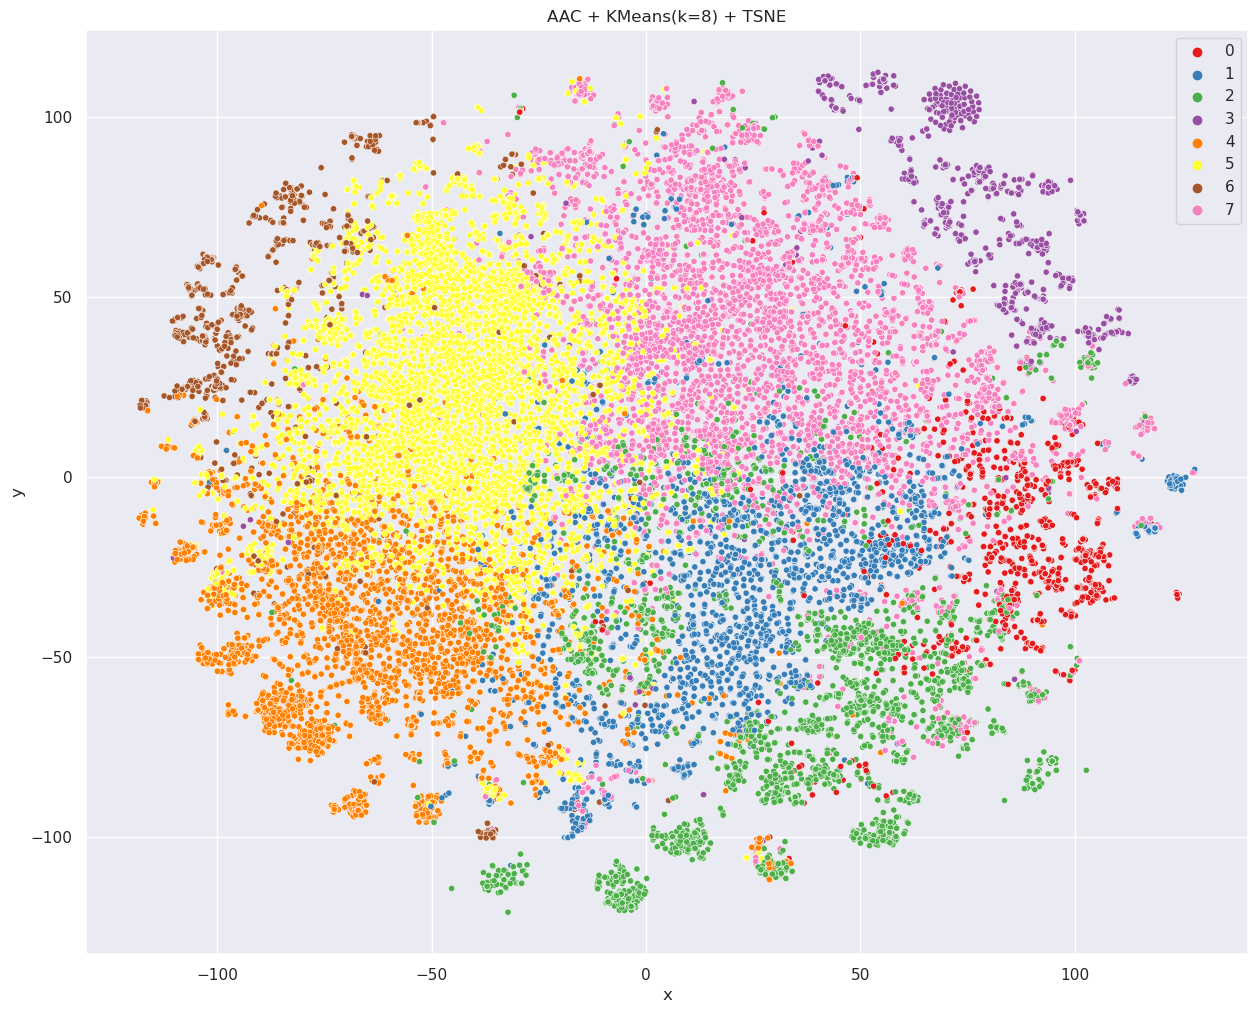

In [111]:
from sklearn.manifold import TSNE

pipe = make_pipeline(
    StandardScaler(),
    TSNE(n_components=2, learning_rate="auto", init="pca", random_state=0, n_jobs=-1),
)
df_pca = pd.DataFrame(pipe.fit_transform(df_aac), columns=["x", "y"])
ax = sns.scatterplot(df_pca, x="x", y="y", hue=labels_kmeans, palette="Set1", s=20)
ax.set_title("AAC + KMeans(k=8) + TSNE")

plt.show()


In [ ]:
# What are the dots? Investigating one of them!

print(df_uniprot.loc[df_aac.index[df_pca[(df_pca.x > 62) & (df_pca.y > 98)].index]].protein_names.value_counts())

# print(df_uniprot.loc[df_aac.index[df_pca[(df_pca.PC1 > 62) & (df_pca.PC2 > 98)].index]].organism_id.value_counts())
# display(df_uniprot.loc[df_aac.index[df_pca[(df_pca.PC1 > 62) & (df_pca.PC2 > 98)].index]].head())

# All of them are lamB Maltoporin (Maltose-inducible porin) from different organisms!

Maltoporin (Maltose-inducible porin)    46
Name: protein_names, dtype: int64


#### PAAC

##### Kmeans + PCA

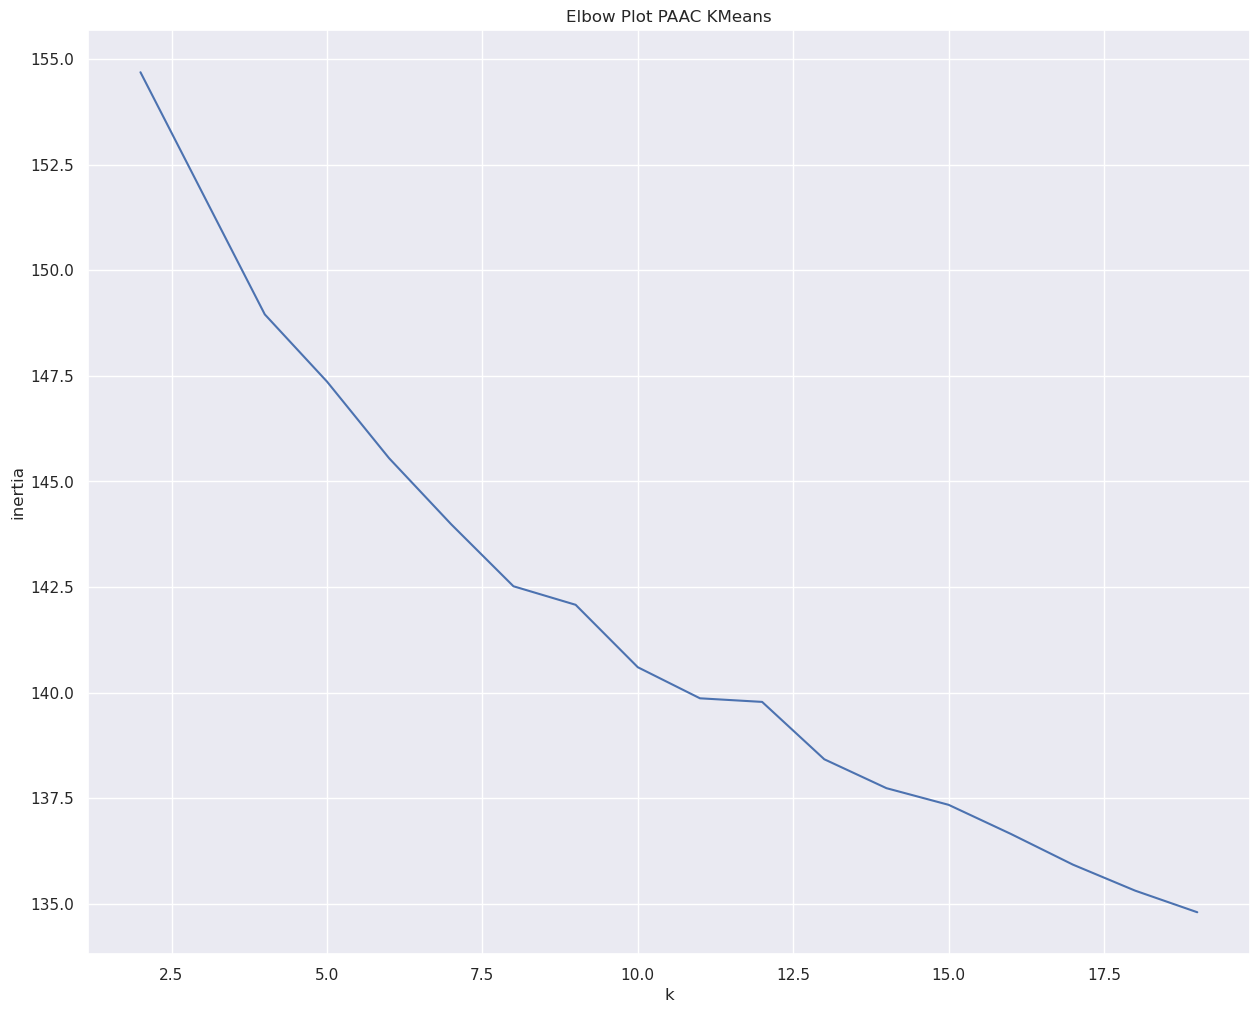

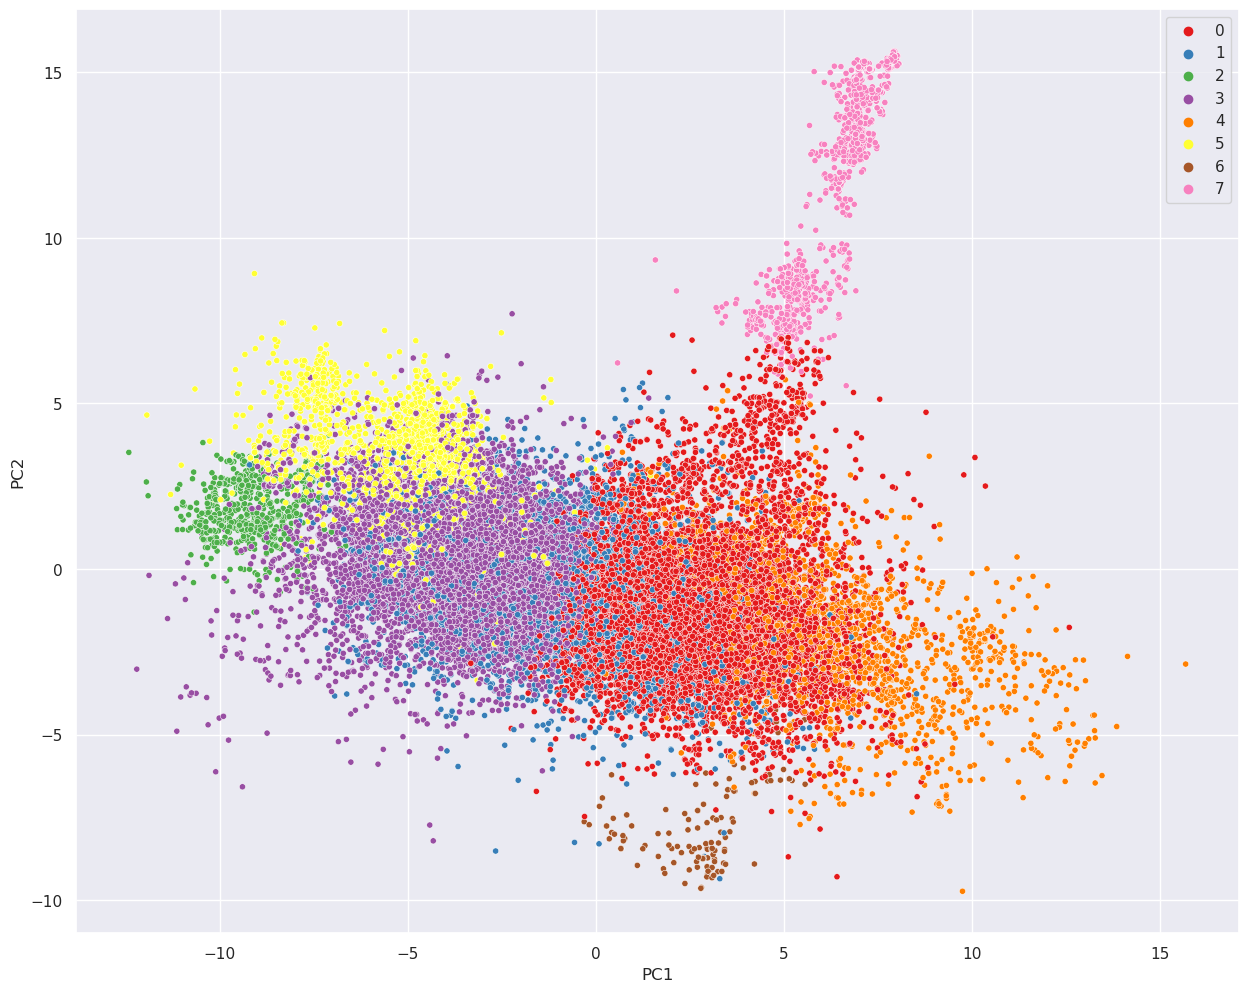

In [66]:
inertias = []
k_values = list(range(2, 20))
for k in k_values:
    kmeans_tmp = KMeans(random_state=0, n_clusters=k)
    kmeans_tmp.fit(df_paac)
    inertias.append(kmeans_tmp.inertia_)

ax = pd.Series(data=inertias, index=k_values).plot()
ax.set_title("Elbow Plot PAAC KMeans")
ax.set_xlabel("k")
ax.set_ylabel("inertia")
plt.show()

num_clusters = 8

kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=num_clusters, random_state=0))

kmeans.fit(df_paac)
labels_kmeans = kmeans["kmeans"].labels_

pipe = make_pipeline(StandardScaler(), PCA(n_components=2,random_state=0))
df_pca = pd.DataFrame(pipe.fit_transform(df_paac), columns=["PC1", "PC2"])
sns.scatterplot(df_pca, x="PC1", y="PC2", hue=labels_kmeans, palette="Set1", s=20)
ax.set_title("PAAC + KMeans(k=8) + PCA")
plt.show()


##### Kmeans + PCA + TSNE

/home/ad/mambaforge/envs/subpred4/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


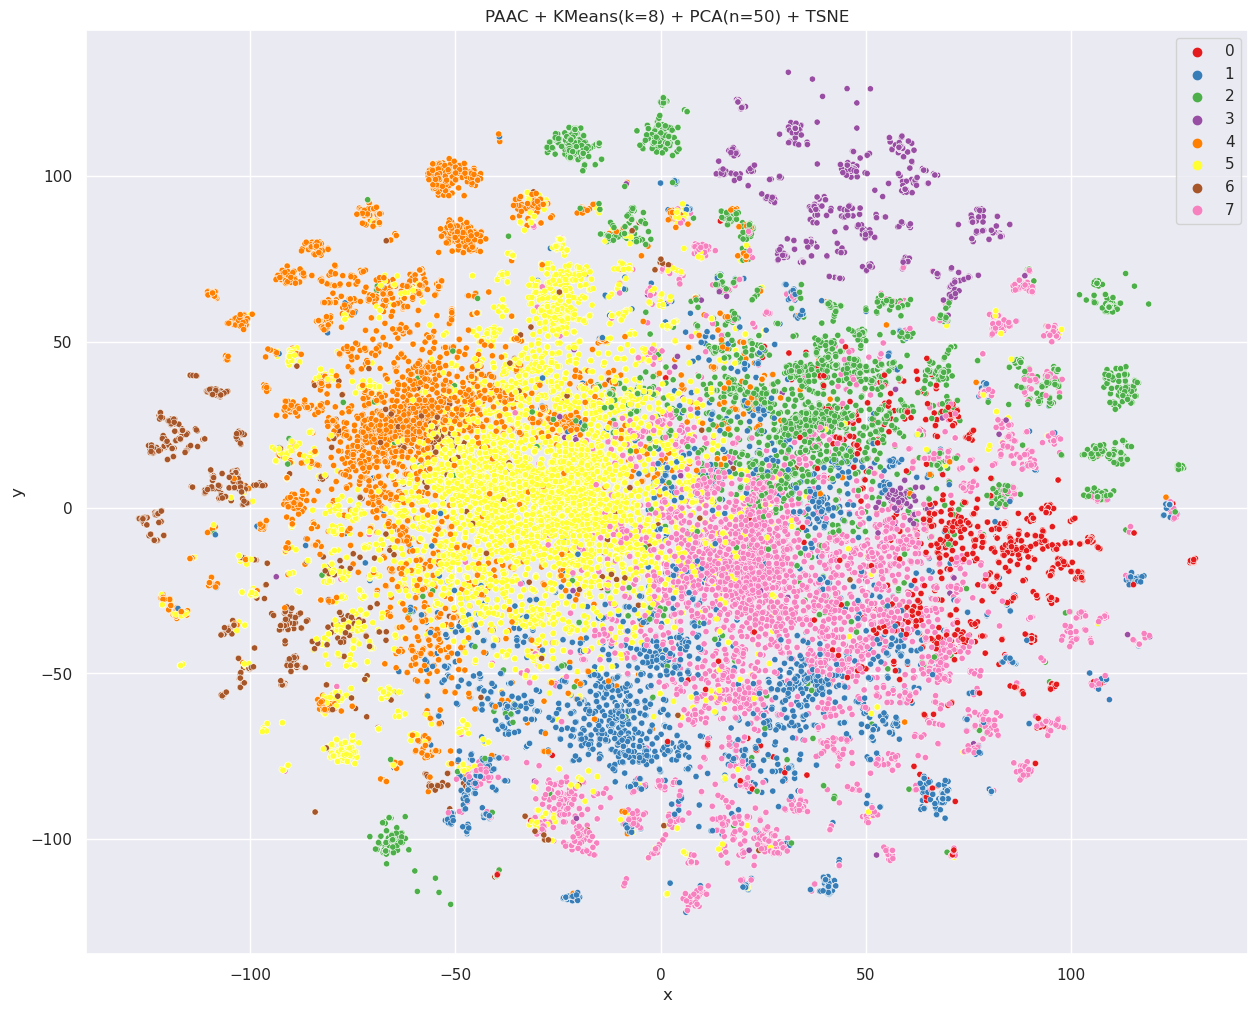

In [93]:
from sklearn.manifold import TSNE

pipe = make_pipeline(
    StandardScaler(),
    PCA(n_components=50, random_state=0),
    TSNE(n_components=2, learning_rate="auto", init="pca", random_state=0, n_jobs=-1),
)
df_pca = pd.DataFrame(pipe.fit_transform(df_paac), columns=["x", "y"])
ax = sns.scatterplot(df_pca, x="x", y="y", hue=labels_kmeans, palette="Set1", s=20)
ax.set_title("PAAC + KMeans(k=8) + PCA(n=50) + TSNE")

plt.show()


## Trying Sequence clustering CLI programs:
- CD-Hit
- MMseq2
    - Most important parameters: https://github.com/soedinglab/MMseqs2/wiki#clustering-criteria
    - Output format: Long TSV TODO write parser
    - Disadvantage: No pairwise scores, no PCA plots

In [30]:
# Fasta export TODO temp file
from subpred.fasta import write_fasta

fasta_file_name = "/home/ad/tmp.fasta"

# df_uniprot_test = df_uniprot[
#     (df_uniprot.reviewed == "reviewed")
#     & (df_uniprot.protein_existence == "Evidence at protein level")
# ]
df_uniprot_test = df_uniprot[
    (df_uniprot.protein_existence == "Evidence at protein level")
]
df_uniprot_test = df_uniprot_test.sequence.reset_index(drop=False)
df_uniprot_test = df_uniprot_test[~df_uniprot_test.duplicated()]
sequences_test = df_uniprot_test.set_index("Uniprot", drop=True).sequence
# write_fasta(fasta_file_name, fasta_data)


In [31]:
transmembrane_transporter_terms = go.get_descendants(
    go.get_identifier("transmembrane transporter activity")
)
transmembrane_transporters = set(
    df_annotations[
        (df_annotations.dataset == "go_id")
        & df_annotations.annotation.isin(transmembrane_transporter_terms)
    ].Uniprot.unique()
)

sequences_uniprot = df_uniprot.sequence
sequences_transmembrane_transporters = sequences_uniprot[
    sequences_uniprot.index.isin(transmembrane_transporters)
]
# df_uniprot[
#     (df_uniprot.protein_existence == "Evidence at protein level")
# ]


In [32]:
amino_transporter_terms = go.get_descendants(
    go.get_identifier("amino acid transmembrane transporter activity")
)
amino_transporters = set(
    df_annotations[
        (df_annotations.dataset == "go_id")
        & df_annotations.annotation.isin(amino_transporter_terms)
    ].Uniprot.unique()
)

sequences_uniprot = df_uniprot.sequence
sequences_amino_transporters = sequences_uniprot[
    sequences_uniprot.index.isin(amino_transporters)
]

### using cd-hit

- wrote parser for results file

cd-hit: clustered .......... sequences into finished clusters at threshold 40


Text(0.5, 1.0, 'CD-HIT clusters of transmembrane transporter sequences')

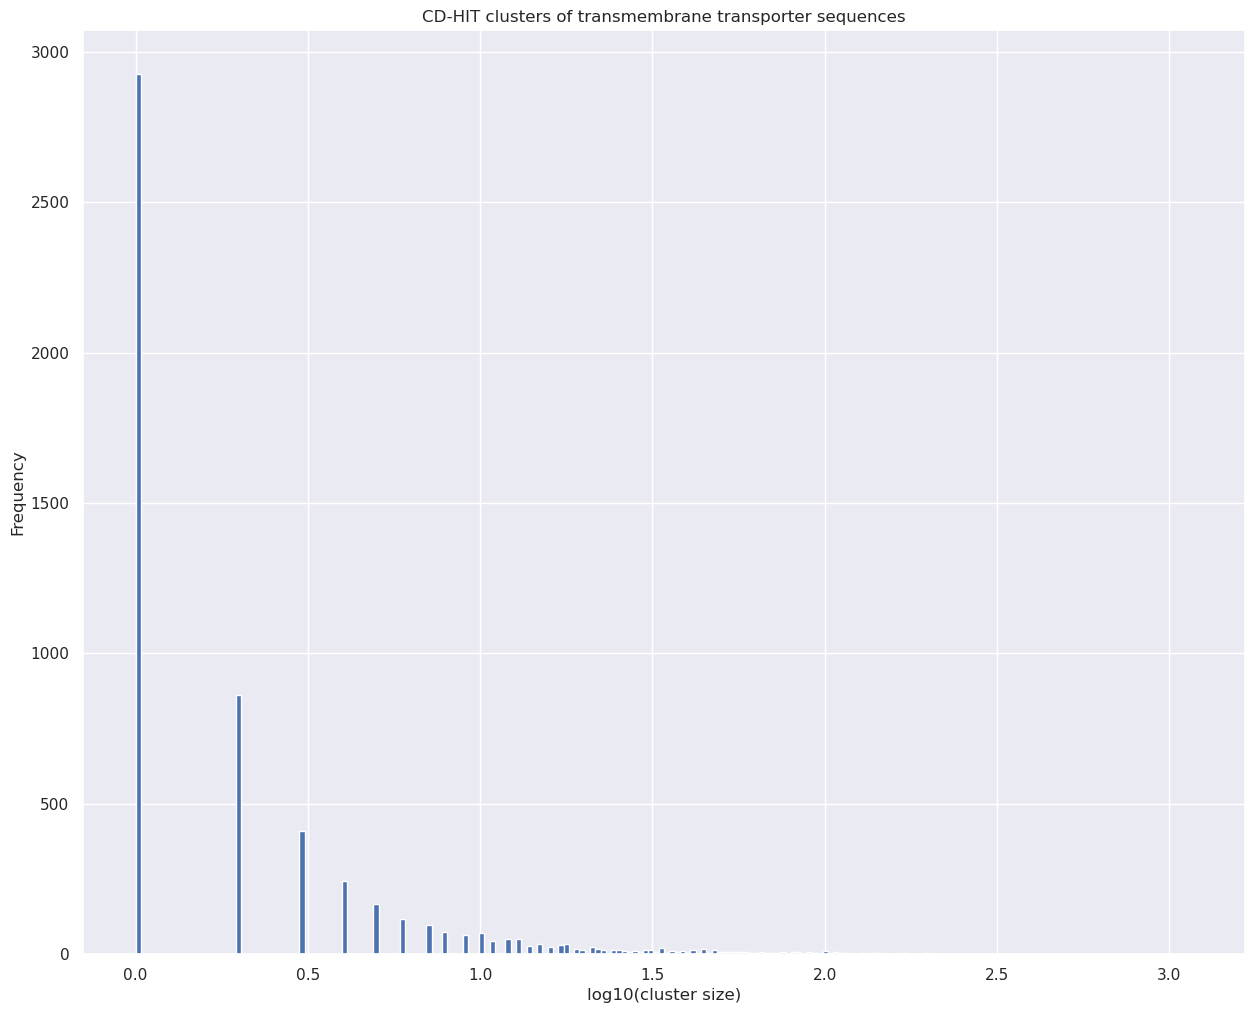

In [33]:
from subpred.cdhit import cd_hit
import numpy as np

cdhit_res = cd_hit(
    sequences_transmembrane_transporters,
    identity_threshold=40,
    n_threads=80,
    return_cluster_file=True,
)
ax = cdhit_res.groupby("cluster").apply(len).apply(np.log10).plot.hist(bins=200)
ax.set_xlabel("log10(cluster size)")
ax.set_title("CD-HIT clusters of transmembrane transporter sequences")

cd-hit: clustered 1347 sequences into 238 clusters at threshold 40


Text(0.5, 1.0, 'CD-HIT clusters of transmembrane transporter sequences threshold 40%')

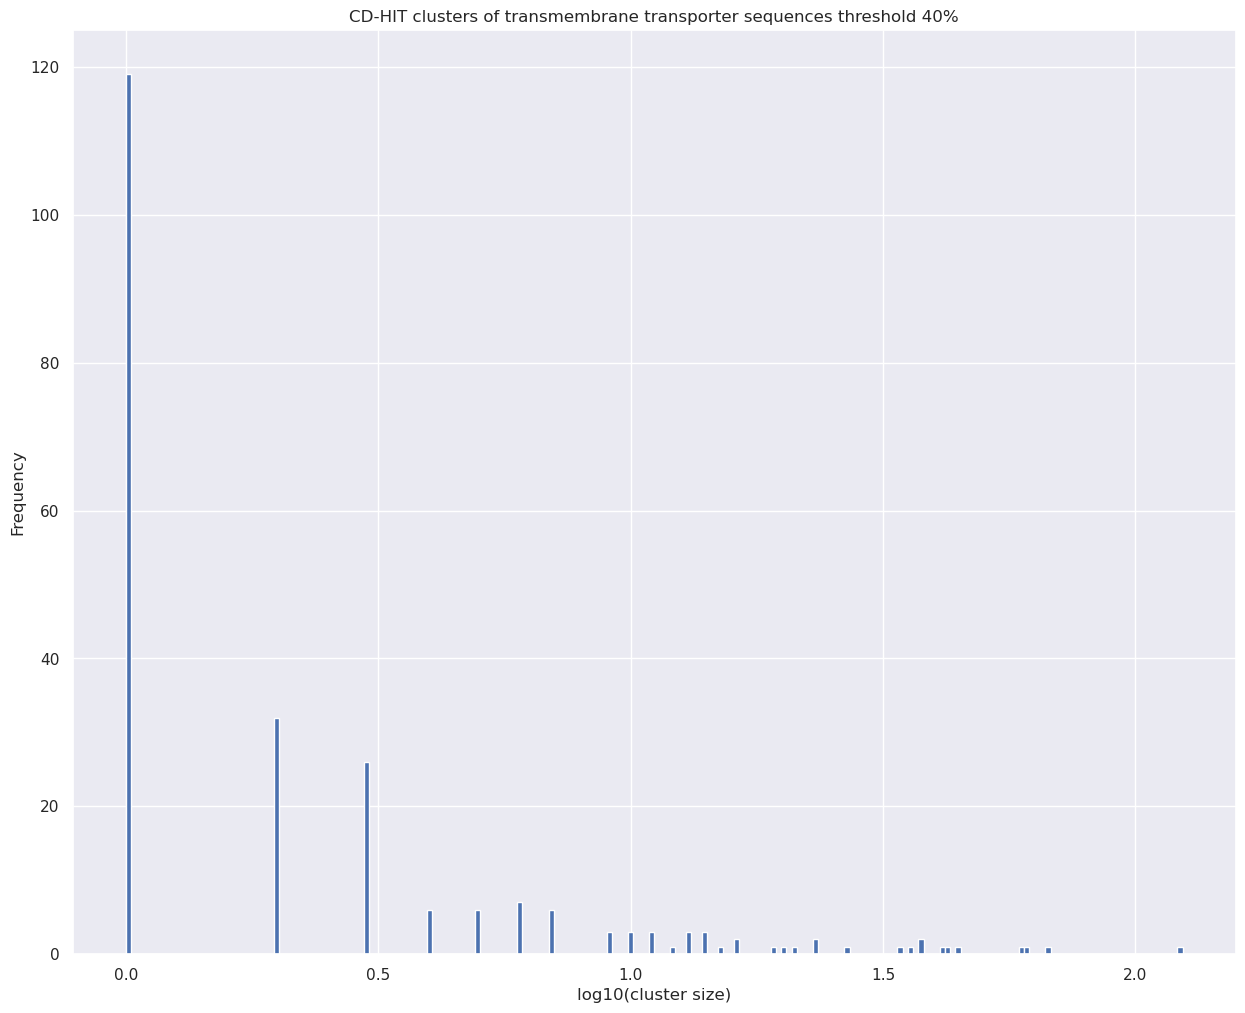

In [106]:
from subpred.cdhit import cd_hit
import numpy as np

cdhit_res = cd_hit(
    sequences_amino_transporters,
    identity_threshold=40,
    n_threads=80,
    return_cluster_file=True,
)
ax = cdhit_res.groupby("cluster").apply(len).apply(np.log10).plot.hist(bins=200)
ax.set_xlabel("log10(cluster size)")
ax.set_title("CD-HIT clusters of transmembrane transporter sequences threshold 40%")

Exporting sequences to generate NLP codes

In [35]:
sequences_transmembrane_transporters.to_csv("/home/ad/biovec_test/uniprot_transporter_sequences.tsv", sep="\t")



### Using mmseqs2

mmseqs easy-cluster tmp.fasta tmp_out.fasta tmp


--min-seq-id 0.5 -c 0.8 --cov-mode 1


 mmseqs easy-cluster examples/DB.fasta result tmp



In [36]:
# Cluster output
#  - result_rep_seq.fasta: Representatives
#  - result_all_seq.fasta: FASTA-like per cluster
#  - result_cluster.tsv:   Adjacency list

# Important parameter: --min-seq-id, --cov-mode and -c
#                  --cov-mode
#                  0    1    2
# Q: MAVGTACRPA  60%  IGN  60%
# T: -AVGTAC---  60% 100%  IGN
#        -c 0.7    -    +    -
#        -c 0.6    +    +    +

# Cascaded clustering with reassignment
# - Corrects criteria-violations of cascaded merging
# - Produces more clusters and is a bit slower


In [37]:
# TODO finish

import tempfile
import subprocess
import os
from subpred.fasta import read_fasta, write_fasta
import pandas as pd


def mmseq(
    sequences: pd.Series,
    fast_algo: bool = False,
    cluster_mode: int = 0,
    min_seq_id: float = 0.0,
    min_coverage: float = 0.8,
    cov_mode: int = 0,
    max_evalue: float = 1e-3,
    verbose: bool = False,
) -> pd.DataFrame:
    """Python wrapper for MMSeqs2

    Args:
        sequences (pd.Series):
            Series with identifiers as index and amino acid sequences as values
        fast_algo (bool, optional):
            Use linclust algorithm (for huge datasets). Defaults to False.
        cluster_mode (int, optional):
            0: Set-Cover (greedy)
            1: Connected component (BLASTclust)
            2,3: Greedy clustering by sequence length (CDHIT).
            Defaults to 0.
        min_seq_id (float, optional):
            List matches above this sequence identity (for clustering) (range 0.0-1.0). Defaults to 0.0.
        min_coverage (float, optional):
            -c. List matches above this fraction of aligned (covered) residues (see cov-mode). Defaults to 0.8.
        cov_mode (int, optional):
            0: coverage of query and target
            1: coverage of target
            2: coverage of query
            3-5 also exist
            Defaults to 0.
        max_evalue (float, optional):
            List matches below this E-value (range 0.0-inf). Defaults to 1e-3.
        verbose (bool, optional):
            Print command, and output of MMSeq2. Defaults to False.
    """

    with (
        tempfile.NamedTemporaryFile(suffix=".fasta") as tmp_fasta_in,
        tempfile.NamedTemporaryFile() as tmp_out,
        tempfile.TemporaryDirectory() as tmp_folder,
    ):
        fasta_data = list(
            zip(
                [">" + ac for ac in sequences.index.tolist()], sequences.values.tolist()
            )
        )
        write_fasta(fasta_file_name=tmp_fasta_in.name, fasta_data=fasta_data)

        seq_db_path = tmp_fasta_in.name.replace(".fasta", ".seqdb")

        cluster_fasta = tmp_out.name + "_all_seqs.fasta"
        cluster_tsv = tmp_out.name + "_cluster.tsv"
        cluster_representatives_fasta = tmp_out.name + "_rep_seq.fasta"

        execution = [
            "mmseqs",
            "easy-linclust" if fast_algo else "easy-cluster",
            # "easy-linclust",
            tmp_fasta_in.name,
            tmp_out.name,
            tmp_folder,
            "--cluster-mode",
            cluster_mode,
            "--min-seq-id",
            min_seq_id,
            "-c",
            min_coverage,
            "--cov-mode",
            cov_mode,
            "-e",
            max_evalue
            # TODO more params via dict
        ]
        execution = [
            str(argument) if not isinstance(argument, str) else argument
            for argument in execution
        ]
        result = subprocess.run(
            execution, check=True, stdout=subprocess.PIPE, universal_newlines=True
        )

        if verbose:
            print("==COMMAND==")
            print(" ".join(execution))
            print("==STDOUT==")
            print(result.stdout)
            print("==STDERR==")
            print(result.stderr)

        cluster_tsv = pd.read_table(cluster_tsv, header=None, names=["Rep", "Cluster"])

    return cluster_tsv


In [38]:
cluster_tsv = mmseq(
    sequences_transmembrane_transporters.drop_duplicates(),
    fast_algo=True,
    # cluster_mode=2,
    # min_seq_id=0,
    min_coverage=0.1,
    cov_mode=1,
    # max_evalue=1e-2,
)


In [39]:
cluster_tsv.duplicated().any()


False

466
1      3658
2      1263
3       612
4       338
5       215
       ... 
332       1
369       1
438       1
439       1
466       1
Length: 129, dtype: int64


Text(0.5, 0, 'log10(cluster size)')

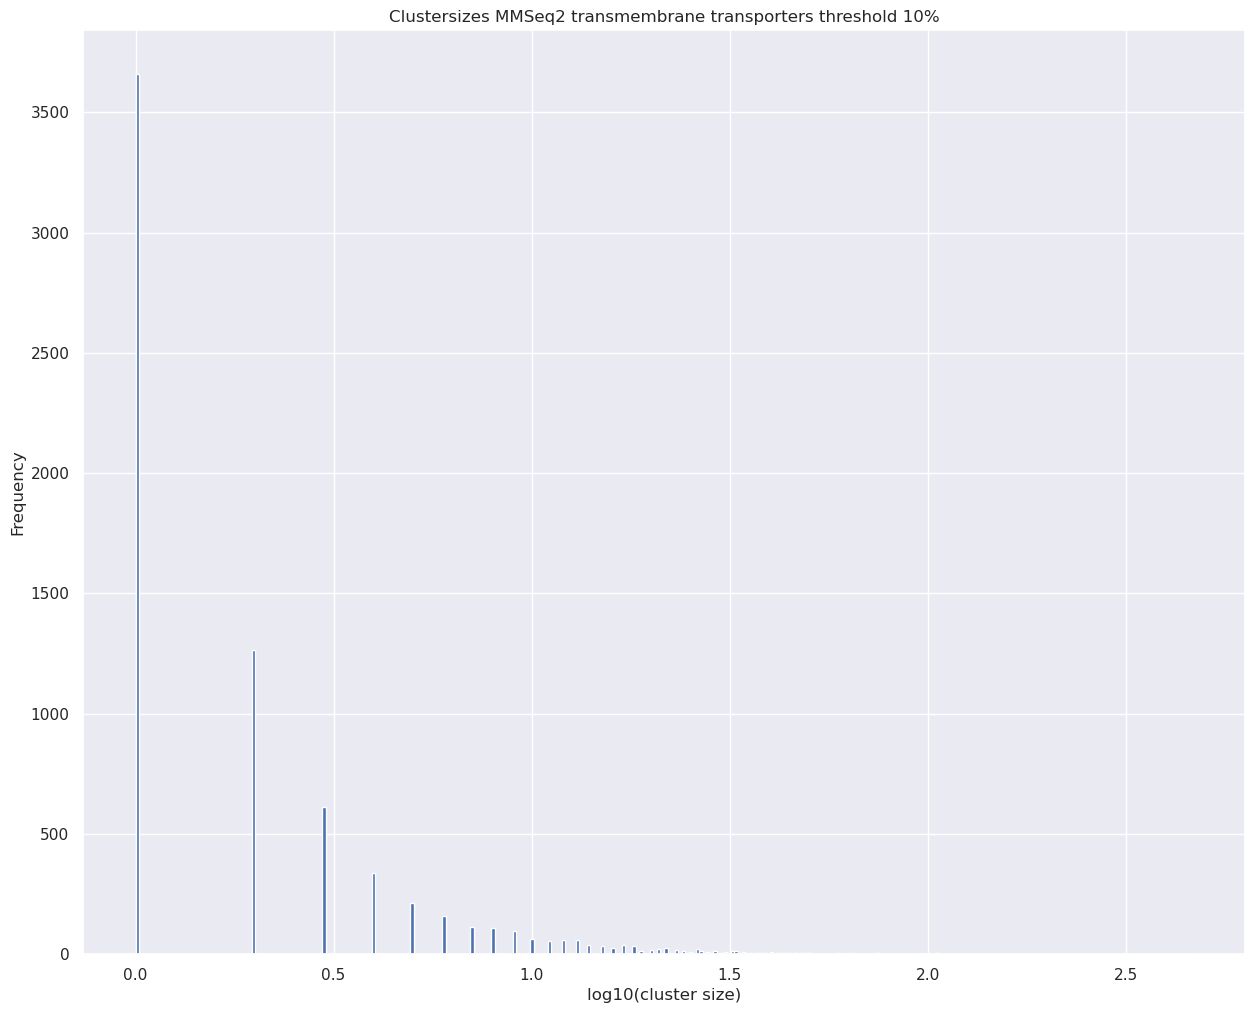

In [108]:
from math import log

print(cluster_tsv.drop_duplicates().groupby("Rep").apply(len).max())

print(
    cluster_tsv.drop_duplicates().groupby("Rep").apply(len).value_counts().sort_index()
)
ax = cluster_tsv.drop_duplicates().groupby("Rep").apply(len).apply(np.log10).plot.hist(bins=300)
ax.set_title("Clustersizes MMSeq2 transmembrane transporters threshold 10%")
ax.set_xlabel("log10(cluster size)")

## Trying NLP Encodings:

secvec did not work out. 

biovec is in separate notebook, since it requires python=3.6

In [95]:
df_biovec = pd.read_table("/home/ad/biovec_test/uniprot_transporter_sequences_encoded.tsv", index_col=0)
df_biovec.head()

0          1          2          3         4          5  \
Uniprot                                                                   
P36021  -7.273644 -34.285100  68.556940 -12.244725 -5.441299 -10.215006   
P43005  -4.140400 -32.438766  63.623220 -14.523251 -6.829222 -10.790448   
P43007  -6.950311 -34.846478  67.427250 -14.485823 -6.727311 -10.528156   
Q5TGU0  -3.028285 -12.994875  22.860323  -1.317772 -4.241808  -4.403067   
Q92536  -5.437946 -33.504353  63.424423  -9.342864 -9.211921  -9.999936   

                 6          7          8          9  ...       290       291  \
Uniprot                                              ...                       
P36021  -68.510020 -22.670380 -39.208435 -11.681757  ...  4.140173  7.689297   
P43005  -71.488716 -19.858337 -35.338825  -8.385507  ...  3.039154  9.374497   
P43007  -72.611015 -21.206213 -38.286050 -10.396503  ...  7.083755  6.126780   
Q5TGU0  -20.944134  -6.393130 -10.412485  -1.996316  ...  1.936083  0.124781   
Q92536  -67.682890 -19.497953 -34.540096  -8.593810  ...  6.935112  7.029308   

               292       293       294       295       296        297  \
Uniprot                                                                 
P36021   -8.704616 -3.346005  2.328844 -5.019221  1.109853  16.568235   
P43005  -13.243600 -3.349254 -1.535459 -2.477200  2.961823  19.141970   
P43007  -10.004407 -1.570559  0.785607 -4.293932  1.667595  14.724697   
Q5TGU0   -2.916309  1.244631 -0.117676 -2.666773  2.721554   3.414848   
Q92536  -11.998138  0.645455  0.094206 -2.755319  4.371674  15.640297   

               298       299  
Uniprot                       
P36021   20.324194 -6.998810  
P43005   21.797276 -5.176438  
P43007   17.068716 -5.410893  
Q5TGU0    5.361672 -2.029417  
Q92536   18.742008 -6.791428  

[5 rows x 300 columns]

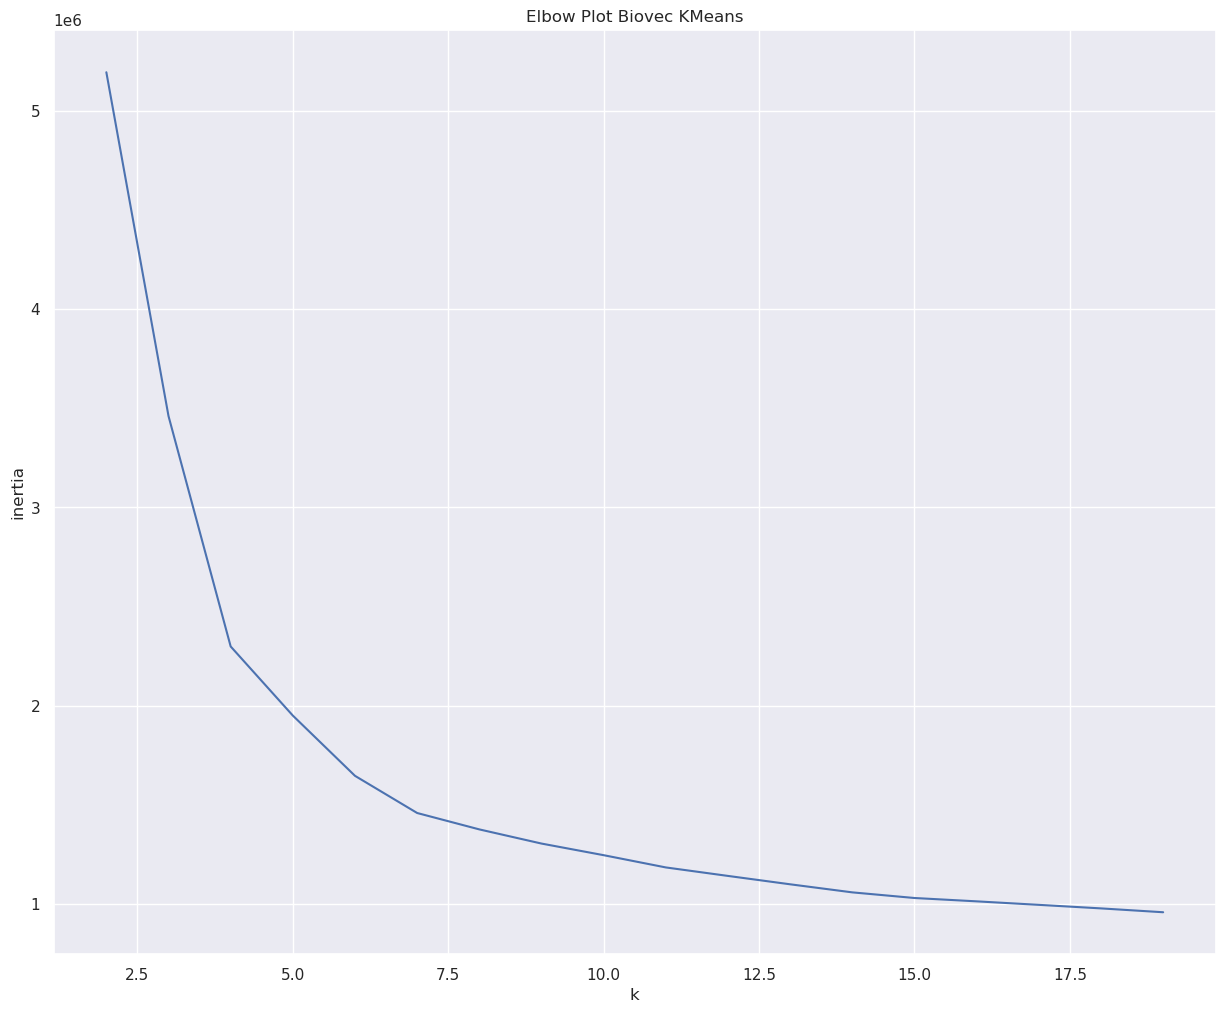

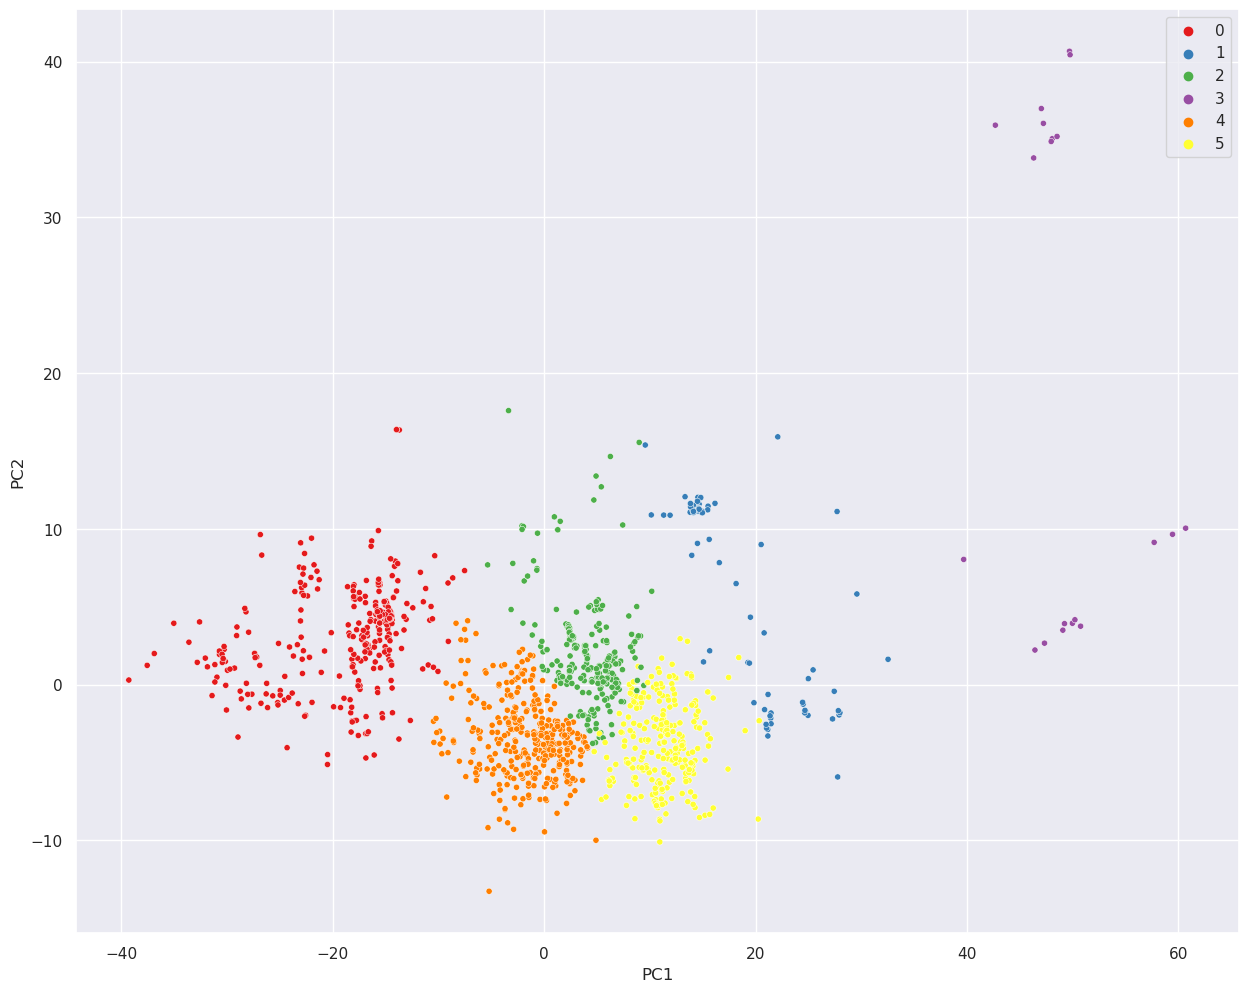

/home/ad/mambaforge/envs/subpred4/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


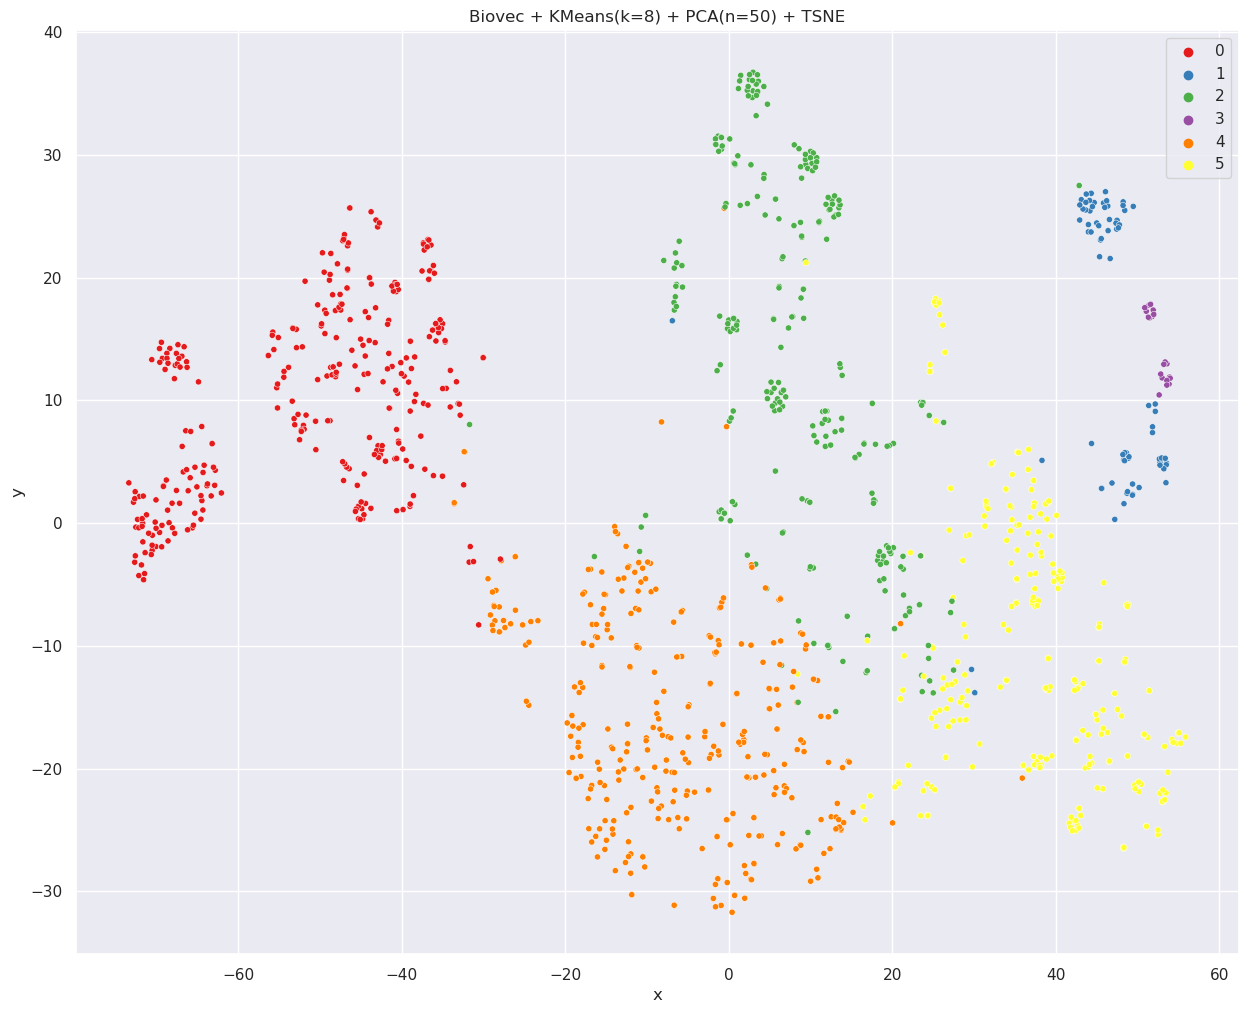

In [98]:
inertias = []
k_values = list(range(2, 20))
for k in k_values:
    kmeans_tmp = KMeans(random_state=0, n_clusters=k)
    kmeans_tmp.fit(df_biovec)
    inertias.append(kmeans_tmp.inertia_)

ax = pd.Series(data=inertias, index=k_values).plot()
ax.set_title("Elbow Plot Biovec KMeans")
ax.set_xlabel("k")
ax.set_ylabel("inertia")
plt.show()

num_clusters = 6

kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=num_clusters, random_state=0))

kmeans.fit(df_biovec)
labels_kmeans = kmeans["kmeans"].labels_

pipe = make_pipeline(StandardScaler(), PCA(n_components=2,random_state=0))
df_pca = pd.DataFrame(pipe.fit_transform(df_biovec), columns=["PC1", "PC2"])
sns.scatterplot(df_pca, x="PC1", y="PC2", hue=labels_kmeans, palette="Set1", s=20)
ax.set_title("Biovec + KMeans(k=8) + PCA")
plt.show()


from sklearn.manifold import TSNE

pipe = make_pipeline(
    StandardScaler(),
    PCA(n_components=50, random_state=0),
    TSNE(n_components=2, learning_rate="auto", init="pca", random_state=0, n_jobs=-1),
)
df_pca = pd.DataFrame(pipe.fit_transform(df_biovec), columns=["x", "y"])
ax = sns.scatterplot(df_pca, x="x", y="y", hue=labels_kmeans, palette="Set1", s=20)
ax.set_title("Biovec + KMeans(k=8) + PCA(n=50) + TSNE")

plt.show()


In [101]:
df_uniprot.loc[df_biovec.index[df_pca[df_pca.y>32].index]]

# This is SLC1A3!

gene_names  \
Uniprot                                             
P43003                  SLC1A3 EAAT1 GLAST GLAST1   
P24942                               Slc1a3 Eaat1   
P56564                          Slc1a3 Eaat1 Gmt1   
P46411                  SLC1A3 EAAT1 GLAST GLAST1   
O57321                               SLC1A3 EAAT1   
G3V846                           Slc1a3 rCG_50959   
A0A7P0TAG7                                 SLC1A3   
Q8N169                                     SLC1A3   
Q543U3                                     Slc1a3   
A0A0G2KAS7                                 Slc1a3   
Q8C3T7                                     Slc1a3   
Q8C7W8                                     Slc1a3   
A0A2I3T0G3                                 SLC1A3   
Q9N280                               SLC1A3 GLAST   
F7CSQ4      slc1a3 ea6 eaat1 glast glast-1 glast1   
A0A286ZJ73                                 SLC1A3   
B0YIF5                                      GLAST   
I2CTJ9                                     SLC1A3   
I2CYT4                                     SLC1A3   
U3CHS6                                     SLC1A3   

                                                protein_names    reviewed  \
Uniprot                                                                     
P43003      Excitatory amino acid transporter 1 (Sodium-de...    reviewed   
P24942      Excitatory amino acid transporter 1 (Glial glu...    reviewed   
P56564      Excitatory amino acid transporter 1 (Glial hig...    reviewed   
P46411      Excitatory amino acid transporter 1 (Sodium-de...    reviewed   
O57321      Excitatory amino acid transporter 1 (SEAAT1) (...    reviewed   
G3V846                                 Amino acid transporter  unreviewed   
A0A7P0TAG7                             Amino acid transporter  unreviewed   
Q8N169                                 Amino acid transporter  unreviewed   
Q543U3                                 Amino acid transporter  unreviewed   
A0A0G2KAS7                             Amino acid transporter  unreviewed   
Q8C3T7                                 Amino acid transporter  unreviewed   
Q8C7W8                                 Amino acid transporter  unreviewed   
A0A2I3T0G3                             Amino acid transporter  unreviewed   
Q9N280                                 Amino acid transporter  unreviewed   
F7CSQ4                                 Amino acid transporter  unreviewed   
A0A286ZJ73                             Amino acid transporter  unreviewed   
B0YIF5                                 Amino acid transporter  unreviewed   
I2CTJ9                                 Amino acid transporter  unreviewed   
I2CYT4                                 Amino acid transporter  unreviewed   
U3CHS6                                 Amino acid transporter  unreviewed   

                       protein_existence  \
Uniprot                                    
P43003         Evidence at protein level   
P24942         Evidence at protein level   
P56564         Evidence at protein level   
P46411      Evidence at transcript level   
O57321         Evidence at protein level   
G3V846         Evidence at protein level   
A0A7P0TAG7     Evidence at protein level   
Q8N169      Evidence at transcript level   
Q543U3         Evidence at protein level   
A0A0G2KAS7     Evidence at protein level   
Q8C3T7      Evidence at transcript level   
Q8C7W8      Evidence at transcript level   
A0A2I3T0G3  Evidence at transcript level   
Q9N280      Evidence at transcript level   
F7CSQ4      Evidence at transcript level   
A0A286ZJ73     Evidence at protein level   
B0YIF5      Evidence at transcript level   
I2CTJ9      Evidence at transcript level   
I2CYT4      Evidence at transcript level   
U3CHS6      Evidence at transcript level   

                                                     sequence  organism_id  \
Uniprot                                                                      
P43003      MTKSNGEEPKMGGRMERFQQGVRKRTLLAKKKVQNITKED

Word2vec is a neural network that encodes words as numerical vectors. The neural network is trained on a corpus of text, which it uses to learn words associations. Words with a more similar meaning also have more similar vectors. The vectors have a fixed size, which usually ranged from 50 to 300. The vector size is a tradeof between training time and memory consumption on one hand, and accurate numerical representation of the word on the other hand. 

The similarity between two words can be calculated through the cosine distance between its corresponding numerical vectors, which is given as dot(X,Y)/(norm(X)*norm(Y)), where X and Y are the vectors for a given word/ngram/kmer and norm() is the euclidean norm. These vectors are also called (word) embeddings.

The approach is applied to biological sequences by splitting the sequence into kmers, usually with k=3. Each sequence is turned into k sentences of words: One starting at position 0, one starting at position 1, and so on. This is supposed to maintain the order in which the kmers appear in the sequence. Example:

    'AGAMQSASM' => [['AGA', 'MQS', 'ASM'], ['GAM','QSA'], ['AMQ', 'SAS']]

The similarities between sentences can be calculated in several ways:

- Cosine distance between the sums of word vectors for both sentences
    - This is the approach used in the Biovec paper, which is from 2016
- The doc2vec library
    - New development, specializes in comparing sentences or entire documents
- Word movers distance (WMD) algorithm: https://radimrehurek.com/gensim/auto_examples/tutorials/run_wmd.html
    - Most recent approach, typically used to search for documents using keywords.

In [ ]:
def split_ngrams(seq, n):
    """
    'AGAMQSASM' => [['AGA', 'MQS', 'ASM'], ['GAM','QSA'], ['AMQ', 'SAS']]
    """
    a, b, c = zip(*[iter(seq)]*n), zip(*[iter(seq[1:])]*n), zip(*[iter(seq[2:])]*n)
    str_ngrams = []
    for ngrams in [a,b,c]:
        x = ["".join(ngram) for ngram in ngrams]
        str_ngrams.append(x)
    return str_ngrams

# def generate_corpusfile(fasta_fname, n, corpus_fname):
#     '''
#     Args:
#         fasta_fname: corpus file name
#         n: the number of chunks to split. In other words, "n" for "n-gram"
#         corpus_fname: corpus_fnameput corpus file path
#     Description:
#         Protvec uses word2vec inside, and it requires to load corpus file
#         to generate corpus.
#     '''
#     f = open(corpus_fname, "w")
#     fasta = Fasta(fasta_fname)
#     for record_id in tqdm(fasta.keys(), desc='corpus generation progress'):
#         r = fasta[record_id]
#         seq = str(r)
#         ngram_patterns = split_ngrams(seq, n)
#         for ngram_pattern in ngram_patterns:
#             f.write(" ".join(ngram_pattern) + "\n")
#     f.close()

In [41]:
from gensim.models import word2vec

# model_w2v = word2vec.Word2Vec.load("/home/ad/biovec_test/swissprot.protvec.model")
# TODO training with w2v directly, without using biovec.